In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,ACB,MWG,MSN,BID,VRE,POW,PLX,HPG,VNM,VHM,...,GVR,SAB,BCM,MBB,GAS,SSB,SHB,SSI,STB,VPB
2020-01-02,9460,37730,46160,32369,34350,11352,48590,10930,82450,62600,...,10150.0,100180,28160.0,9680,68440,NaN,2990.0,8740,10200,7250
2020-01-03,9460,37170,46570,32229,34600,11161,49100,11000,82720,62820,...,10500.0,100440,27880.0,9700,68590,NaN,2900.0,8670,10200,7200
2020-01-06,9260,36990,45830,31610,33650,10827,49280,10930,82090,61500,...,10320.0,100080,27590.0,9560,70760,NaN,2860.0,8640,10050,7030
2020-01-07,9260,37270,46000,32229,33950,10731,48590,10790,82860,61790,...,10050.0,100180,26830.0,9580,70250,NaN,2860.0,8670,10150,7180
2020-01-08,9090,36370,45350,32509,32700,10254,47910,10680,83060,60830,...,9700.0,99810,26640.0,9450,70180,NaN,2860.0,8430,9980,7090


In [3]:
df.ACB

2020-01-02     9460
2020-01-03     9460
2020-01-06     9260
2020-01-07     9260
2020-01-08     9090
              ...  
2024-02-05    27800
2024-02-06    27850
2024-02-07    28000
2024-02-15    27200
2024-02-16    27600
Name: ACB, Length: 1025, dtype: int64

In [4]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [71]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

minPar = minParS = 0
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.ACB,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if minAIC > results.AIC:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC


        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12684D+01    |proj g|=  3.83693D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.837D-08   1.127D+01
  F =   11.268395594589705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25127D+00    |proj g|=  3.63941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.677D-05   8.251D+00
  F =   8.2507515276246561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.403D-03   8.350D+00
  F =   8.3499223485385095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33691D+00    |proj g|=  3.47593D-01

At iterate    5    f=  8.33585D+00    |proj g|=  5.48649D-01

At iterate   10    f=  8.33372D+00    |proj g|=  7.63001D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     26      1     0     0   3.000D-04   8.334D+00
  F =   8.3337198589293209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25620D+00    |proj g|=  4.91394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24825D+00    |proj g|=  1.76911D-02

At iterate    5    f=  8.24235D+00    |proj g|=  1.70038D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     11      1     0     0   1.700D-05   8.242D+00
  F =   8.2423478478795964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.08886D+01    |proj g|=  4.09623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     13      1     0     0   3.857D-05   1.089D+01
  F =   10.888576086138492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06976D+01    |proj g|=  8.66657D-02


 This problem is unconstrained.



At iterate    5    f=  1.06761D+01    |proj g|=  5.04364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     24      1     0     0   2.244D-04   1.068D+01
  F =   10.676097603285399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06111D+00    |proj g|=  5.21047D-01

At iterate    5    f=  8.01884D+00    |proj g|=  4.50449D-04


 This problem is unconstrained.



At iterate   10    f=  8.01880D+00    |proj g|=  1.03056D-02

At iterate   15    f=  8.01326D+00    |proj g|=  1.46569D-01

At iterate   20    f=  7.93520D+00    |proj g|=  1.89833D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     25      1     0     0   1.315D-06   7.935D+00
  F =   7.9350819197361817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95841D+00    |proj g|=  5.79199D-01


 This problem is unconstrained.



At iterate    5    f=  7.91507D+00    |proj g|=  4.09293D-03

At iterate   10    f=  7.91497D+00    |proj g|=  1.11733D-02

At iterate   15    f=  7.90507D+00    |proj g|=  1.42191D-01

At iterate   20    f=  7.82709D+00    |proj g|=  1.46899D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   9.217D-06   7.824D+00
  F =   7.8242312342147171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.05922D+01    |proj g|=  8.54238D-01

At iterate   20    f=  1.05309D+01    |proj g|=  1.15765D-01

At iterate   25    f=  8.86402D+00    |proj g|=  4.05520D+00

At iterate   30    f=  7.96758D+00    |proj g|=  4.94371D-01

At iterate   35    f=  7.94631D+00    |proj g|=  7.90347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     61      1     0     0   8.260D-05   7.946D+00
  F =   7.9463111579535681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.06339D+01    |proj g|=  2.45160D-04

At iterate   15    f=  1.06337D+01    |proj g|=  9.86797D-04

At iterate   20    f=  1.06288D+01    |proj g|=  3.65611D-02

At iterate   25    f=  1.04930D+01    |proj g|=  7.06647D-01

At iterate   30    f=  8.96798D+00    |proj g|=  1.90161D+00

At iterate   35    f=  8.40429D+00    |proj g|=  2.24226D+00

At iterate   40    f=  8.13866D+00    |proj g|=  1.75676D+00

At iterate   45    f=  8.01957D+00    |proj g|=  2.50060D-01

At iterate   50    f=  7.96895D+00    |proj g|=  5.76246D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     85   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97543D+00    |proj g|=  6.17461D-01

At iterate    5    f=  7.92834D+00    |proj g|=  6.60469D-03

At iterate   10    f=  7.92788D+00    |proj g|=  2.45715D-02

At iterate   15    f=  7.89243D+00    |proj g|=  2.73072D-01

At iterate   20    f=  7.83501D+00    |proj g|=  3.79797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   5.367D-07   7.835D+00
  F =   7.8350022006161275     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.91308D+00    |proj g|=  5.38806D-03

At iterate   10    f=  7.91156D+00    |proj g|=  8.75529D-03

At iterate   15    f=  7.91153D+00    |proj g|=  1.64450D-03

At iterate   20    f=  7.91085D+00    |proj g|=  2.23951D-02

At iterate   25    f=  7.84872D+00    |proj g|=  2.61024D-01

At iterate   30    f=  7.81852D+00    |proj g|=  7.75930D-02

At iterate   35    f=  7.81758D+00    |proj g|=  7.88194D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     40      1     0     0   6.693D-06   7.818D+00
  F =   7.8175770354072567     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27515D+00    |proj g|=  5.51106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.511D-06   7.275D+00
  F =   7.2751520173180060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17773D+00    |proj g|=  2.14146D-01

At iterate    5    f=  7.14555D+00    |proj g|=  6.86218D-04

At iterate   10    f=  7.14555D+00    |proj g|=  5.90805D-03

At iterate   15    f=  7.14506D+00    |proj g|=  6.63120D-02

At iterate   20    f=  7.13367D+00    |proj g|=  1.57273D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     30      1     0     0   8.255D-06   7.130D+00
  F =   7.1302277897173925     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19436D+00    |proj g|=  1.29322D-02

At iterate    5    f=  7.19393D+00    |proj g|=  1.74323D-04

At iterate   10    f=  7.19393D+00    |proj g|=  3.55936D-04

At iterate   15    f=  7.19392D+00    |proj g|=  2.04016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   1.333D-05   7.194D+00
  F =   7.1939209949054295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19649D+00    |proj g|=  1.95192D-01


 This problem is unconstrained.



At iterate    5    f=  7.14363D+00    |proj g|=  1.10145D-02

At iterate   10    f=  7.14361D+00    |proj g|=  3.44914D-03

At iterate   15    f=  7.14334D+00    |proj g|=  4.87284D-02

At iterate   20    f=  7.13602D+00    |proj g|=  1.46230D-01

At iterate   25    f=  7.12993D+00    |proj g|=  8.43251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   2.158D-06   7.130D+00
  F =   7.1299341242965442     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26837D+00    |proj g|=  4.74641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   4.864D-06   7.268D+00
  F =   7.2683718813479405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23633D+00    |proj g|=  1.29144D-01


 This problem is unconstrained.



At iterate    5    f=  7.21997D+00    |proj g|=  1.38448D-03

At iterate   10    f=  7.21990D+00    |proj g|=  6.07352D-03

At iterate   15    f=  7.21189D+00    |proj g|=  8.73136D-02

At iterate   20    f=  7.12351D+00    |proj g|=  3.62797D-02

At iterate   25    f=  7.12297D+00    |proj g|=  6.15126D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     32      1     0     0   6.151D-06   7.123D+00
  F =   7.1229702682155178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20064D+00    |proj g|=  7.20456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   1.425D-05   7.201D+00
  F =   7.2006362475281565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.



At iterate    5    f=  7.18763D+00    |proj g|=  5.64162D-03

At iterate   10    f=  7.18731D+00    |proj g|=  8.43325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.872D-05   7.187D+00
  F =   7.1873052704816951     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32736D+00    |proj g|=  2.25233D-02


 This problem is unconstrained.



At iterate    5    f=  7.32699D+00    |proj g|=  1.78677D-03

At iterate   10    f=  7.32635D+00    |proj g|=  3.33724D-02

At iterate   15    f=  7.30410D+00    |proj g|=  5.15954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.274D-06   7.303D+00
  F =   7.3028062401099252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24811D+00    |proj g|=  1.18697D-01


 This problem is unconstrained.



At iterate    5    f=  7.21991D+00    |proj g|=  1.72418D-02

At iterate   10    f=  7.21979D+00    |proj g|=  3.00147D-03

At iterate   15    f=  7.21635D+00    |proj g|=  5.51928D-02

At iterate   20    f=  7.12865D+00    |proj g|=  2.46273D-02

At iterate   25    f=  7.12267D+00    |proj g|=  3.48858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     36      1     0     0   4.184D-06   7.123D+00
  F =   7.1226677810580350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.20017D+00    |proj g|=  3.37441D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     26      1     0     0   1.387D-02   7.200D+00
  F =   7.1998220818103507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52840D+00    |proj g|=  2.61156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   2.608D-05   7.528D+00
  F =   7.5283981482038316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3

 This problem is unconstrained.



At iterate    5    f=  7.22788D+00    |proj g|=  7.61480D-02

At iterate   10    f=  7.22386D+00    |proj g|=  1.53636D-03

At iterate   15    f=  7.22385D+00    |proj g|=  1.13546D-02

At iterate   20    f=  7.22342D+00    |proj g|=  1.21467D-01

At iterate   25    f=  7.21528D+00    |proj g|=  1.52603D-01

At iterate   30    f=  7.14104D+00    |proj g|=  7.10368D-01

At iterate   35    f=  7.13821D+00    |proj g|=  8.15411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     52      1     0     0   2.276D-05   7.138D+00
  F =   7.1382120974348462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72924D+00    |proj g|=  1.02484D+00

At iterate    5    f=  7.36529D+00    |proj g|=  4.05457D+00

At iterate   10    f=  7.19984D+00    |proj g|=  1.91595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     0     0   2.341D-05   7.200D+00
  F =   7.1998429118850158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.33001D+00    |proj g|=  2.35010D+00

At iterate   10    f=  7.20454D+00    |proj g|=  7.32261D-02

At iterate   15    f=  7.20443D+00    |proj g|=  7.03682D-01

At iterate   20    f=  7.20023D+00    |proj g|=  1.07441D+00

At iterate   25    f=  7.19974D+00    |proj g|=  2.34403D-02

At iterate   30    f=  7.19974D+00    |proj g|=  7.82897D-02

At iterate   35    f=  7.19973D+00    |proj g|=  2.24825D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     49      1     0     0   2.248D-05   7.200D+00
  F =   7.1997335886870344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38222D+00    |proj g|=  3.66628D-01

At iterate    5    f=  7.30926D+00    |proj g|=  5.23863D-04

At iterate   10    f=  7.30911D+00    |proj g|=  1.59716D-02

At iterate   15    f=  7.30097D+00    |proj g|=  2.41301D-01

At iterate   20    f=  7.28812D+00    |proj g|=  3.49813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   8.415D-07   7.288D+00
  F =   7.2881246400179807     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  7.25186D+00    |proj g|=  4.66108D-01

At iterate   10    f=  7.22412D+00    |proj g|=  1.83651D-01

At iterate   15    f=  7.22383D+00    |proj g|=  1.06350D-03

At iterate   20    f=  7.22382D+00    |proj g|=  3.09047D-02

At iterate   25    f=  7.22187D+00    |proj g|=  3.85698D-01

At iterate   30    f=  7.17076D+00    |proj g|=  1.04122D+00

At iterate   35    f=  7.14436D+00    |proj g|=  1.01740D+00

At iterate   40    f=  7.13821D+00    |proj g|=  2.10686D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     50      1     0     0   8.925D-05   7.138D+00
  F =   7.13821030268

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27439D+00    |proj g|=  2.98151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1      3      1     0     0   1.147D-05   7.274D+00
  F =   7.2743851851965120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37628D+00    |proj g|=  3.73423D-01

At iterate    5    f=  7.21696D+00    |proj g|=  3.96246D-02

At iterate   10    f=  7.21634D+00    |proj g|=  1.10890D-03

At iterate   15    f=  7.21630D+00    |proj g|=  6.57905D-02

At iterate   20    f=  7.20962D+00    |proj g|=  9.09355D-01

At iterate   25    f=  7.14473D+00    |proj g|=  1.83400D-01

At iterate   30    f=  7.13135D+00    |proj g|=  2.34039D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.58077D+00    |proj g|=  1.19106D+00

At iterate   10    f=  7.22849D+00    |proj g|=  2.54359D-01

At iterate   15    f=  7.22098D+00    |proj g|=  2.86502D+00

At iterate   20    f=  7.19983D+00    |proj g|=  5.02673D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     47      1     0     0   1.614D-03   7.200D+00
  F =   7.1998325482210417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56147D+00    |proj g|=  8.62301D-01

At iterate    5    f=  7.32147D+00    |proj g|=  2.29320D+00

At iterate   10    f=  7.19908D+00    |proj g|=  3.23453D-01

At iterate   15    f=  7.19814D+00    |proj g|=  4.19022D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  7.30908D+00    |proj g|=  5.22734D-04

At iterate   10    f=  7.30815D+00    |proj g|=  3.59832D-02

At iterate   15    f=  7.28929D+00    |proj g|=  4.21858D-02

At iterate   20    f=  7.28807D+00    |proj g|=  1.47143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   8.353D-07   7.288D+00
  F =   7.2880699462389256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.22199D+00    |proj g|=  8.21438D-02

At iterate   10    f=  7.21696D+00    |proj g|=  6.36483D-02

At iterate   15    f=  7.21633D+00    |proj g|=  2.57859D-03

At iterate   20    f=  7.21621D+00    |proj g|=  4.58594D-02

At iterate   25    f=  7.19654D+00    |proj g|=  5.97013D-01

At iterate   30    f=  7.13248D+00    |proj g|=  3.20553D-01

At iterate   35    f=  7.13134D+00    |proj g|=  2.11611D-03

At iterate   40    f=  7.13134D+00    |proj g|=  8.52841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     60      1     0     0   2.356D-05   7.131D+00
  F =   7.13133909526

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   2.341D-05   7.194D+00
  F =   7.1939730104306525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54592D+00    |proj g|=  4.92433D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24318D+00    |proj g|=  1.29637D-01


 This problem is unconstrained.



At iterate    5    f=  7.22669D+00    |proj g|=  1.66589D-03

At iterate   10    f=  7.22660D+00    |proj g|=  7.37572D-03

At iterate   15    f=  7.21613D+00    |proj g|=  1.00693D-01

At iterate   20    f=  7.13079D+00    |proj g|=  2.30046D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   5.844D-06   7.130D+00
  F =   7.1301846732913257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19400D+00    |proj g|=  4.81313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   2.361D-05   7.194D+00
  F =   7.1939952866079171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32005D+00    |proj g|=  2.25052D-02

At iterate    5    f=  7.31969D+00    |proj g|=  1.86996D-03

At iterate   10    f=  7.31901D+00    |proj g|=  3.46868D-02

At iterate   15    f=  7.29990D+00    |proj g|=  7.71694D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   5.199D-07   7.296D+00
  F =   7.2959713203259673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.22658D+00    |proj g|=  1.17235D-02

At iterate   10    f=  7.22654D+00    |proj g|=  6.51652D-03

At iterate   15    f=  7.22528D+00    |proj g|=  4.83124D-02

At iterate   20    f=  7.14737D+00    |proj g|=  1.54189D-01

At iterate   25    f=  7.12989D+00    |proj g|=  9.74886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   8.695D-06   7.130D+00
  F =   7.1298915660947566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18709D+00    |proj g|=  1.30440D-01


 This problem is unconstrained.



At iterate    5    f=  7.62020D+00    |proj g|=  2.89003D-01

At iterate   10    f=  7.30113D+00    |proj g|=  6.48067D-01

At iterate   15    f=  7.18713D+00    |proj g|=  7.55902D-04

At iterate   20    f=  7.18709D+00    |proj g|=  8.98512D-03

At iterate   25    f=  7.18674D+00    |proj g|=  7.86005D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     57      1     0     0   2.532D-05   7.187D+00
  F =   7.1867269568511576     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  7.53891D+00    |proj g|=  9.28978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   1.608D-05   7.539D+00
  F =   7.5389098897316824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23655D+00    |proj g|=  1.28670D-01


 This problem is unconstrained.



At iterate    5    f=  7.22022D+00    |proj g|=  3.57202D-03

At iterate   10    f=  7.22020D+00    |proj g|=  6.14873D-03

At iterate   15    f=  7.21885D+00    |proj g|=  6.13916D-02

At iterate   20    f=  7.21593D+00    |proj g|=  1.10857D-02

At iterate   25    f=  7.21570D+00    |proj g|=  1.44491D-02

At iterate   30    f=  7.20331D+00    |proj g|=  1.26432D-01

At iterate   35    f=  7.14215D+00    |proj g|=  4.86094D-01

At iterate   40    f=  7.12353D+00    |proj g|=  2.20840D-02

At iterate   45    f=  7.12256D+00    |proj g|=  1.08994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     79   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19567D+00    |proj g|=  1.30436D-01

At iterate    5    f=  7.99617D+00    |proj g|=  6.20230D-01

At iterate   10    f=  7.22964D+00    |proj g|=  2.48199D-01

At iterate   15    f=  7.19666D+00    |proj g|=  5.76161D-02

At iterate   20    f=  7.19312D+00    |proj g|=  3.79220D-01

At iterate   25    f=  7.19259D+00    |proj g|=  1.86160D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     55      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  7.59523D+00    |proj g|=  7.15425D-01
  ys=-1.631E+00  -gs= 8.457E-01 BFGS update SKIPPED

At iterate   10    f=  7.19257D+00    |proj g|=  1.57387D-01

At iterate   15    f=  7.18879D+00    |proj g|=  7.46224D-02

At iterate   20    f=  7.18849D+00    |proj g|=  4.31685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     49      1     1     0   2.194D-04   7.188D+00
  F =   7.1884921394847821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  7.31973D+00    |proj g|=  7.34371D-04

At iterate   10    f=  7.31963D+00    |proj g|=  5.42608D-03
  ys=-6.879E-03  -gs= 8.952E-04 BFGS update SKIPPED

At iterate   15    f=  7.31398D+00    |proj g|=  2.26089D-01

At iterate   20    f=  7.30898D+00    |proj g|=  1.37344D-02

At iterate   25    f=  7.30797D+00    |proj g|=  6.30926D-02

At iterate   30    f=  7.29427D+00    |proj g|=  2.08749D-02

At iterate   35    f=  7.28519D+00    |proj g|=  1.02005D-01

At iterate   40    f=  7.28289D+00    |proj g|=  1.47779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     91      1     1

 This problem is unconstrained.



At iterate    5    f=  7.22031D+00    |proj g|=  4.43999D-02

At iterate   10    f=  7.22003D+00    |proj g|=  1.01323D-03

At iterate   15    f=  7.21913D+00    |proj g|=  2.34400D-02

At iterate   20    f=  7.21486D+00    |proj g|=  1.37145D-02

At iterate   25    f=  7.21468D+00    |proj g|=  2.45939D-03

At iterate   30    f=  7.20864D+00    |proj g|=  6.37647D-02

At iterate   35    f=  7.15759D+00    |proj g|=  1.42803D-01

At iterate   40    f=  7.12327D+00    |proj g|=  6.26085D-02

At iterate   45    f=  7.12279D+00    |proj g|=  4.08522D-03

At iterate   50    f=  7.12251D+00    |proj g|=  3.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [72]:
minPar

0

In [7]:
mod = sm.tsa.statespace.SARIMAX(df.ACB,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24826D+00    |proj g|=  1.18972D-01

At iterate    5    f=  7.22031D+00    |proj g|=  4.43999D-02

At iterate   10    f=  7.22003D+00    |proj g|=  1.01323D-03

At iterate   15    f=  7.21913D+00    |proj g|=  2.34400D-02

At iterate   20    f=  7.21486D+00    |proj g|=  1.37145D-02

At iterate   25    f=  7.21468D+00    |proj g|=  2.45939D-03

At iterate   30    f=  7.20864D+00    |proj g|=  6.37647D-02

At iterate   35    f=  7.15759D+00    |proj g|=  1.42803D-01

At iterate   40    f=  7.12327D+00    |proj g|=  6.26085D-02

At iterate   45    f=  7.12279D+00    |proj g|=  4.08522D-03

At iterate   50    f=  7.12251D+00    |proj g|=  3.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

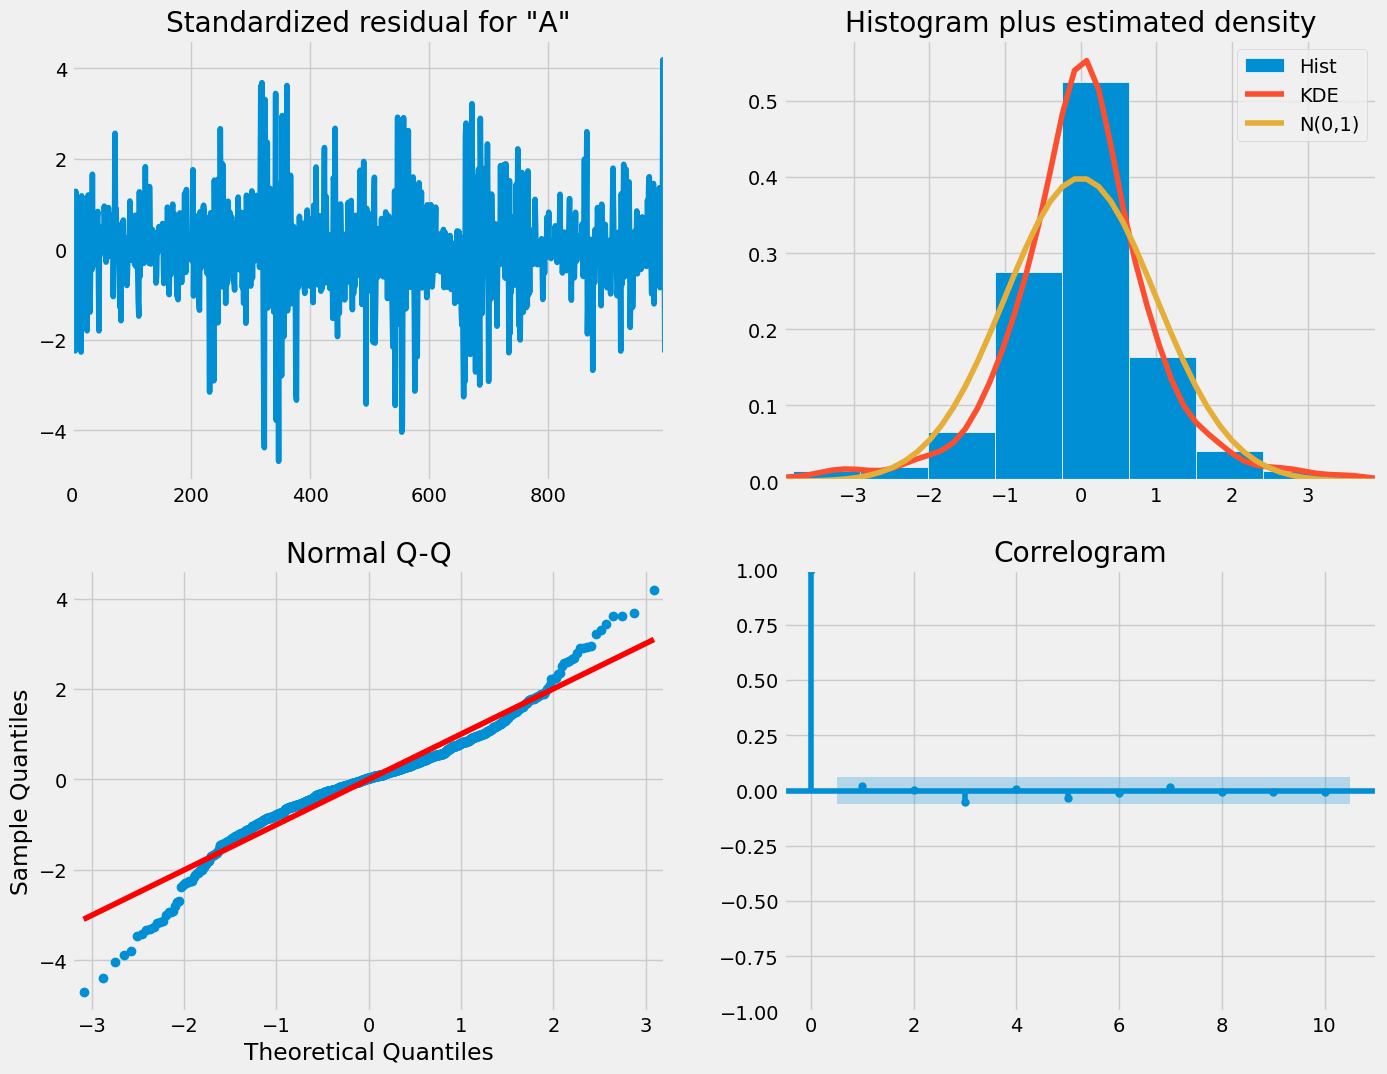

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
pred = results.get_prediction(start='2024-01-02', dynamic=False)
pred_ci = pred.conf_int()

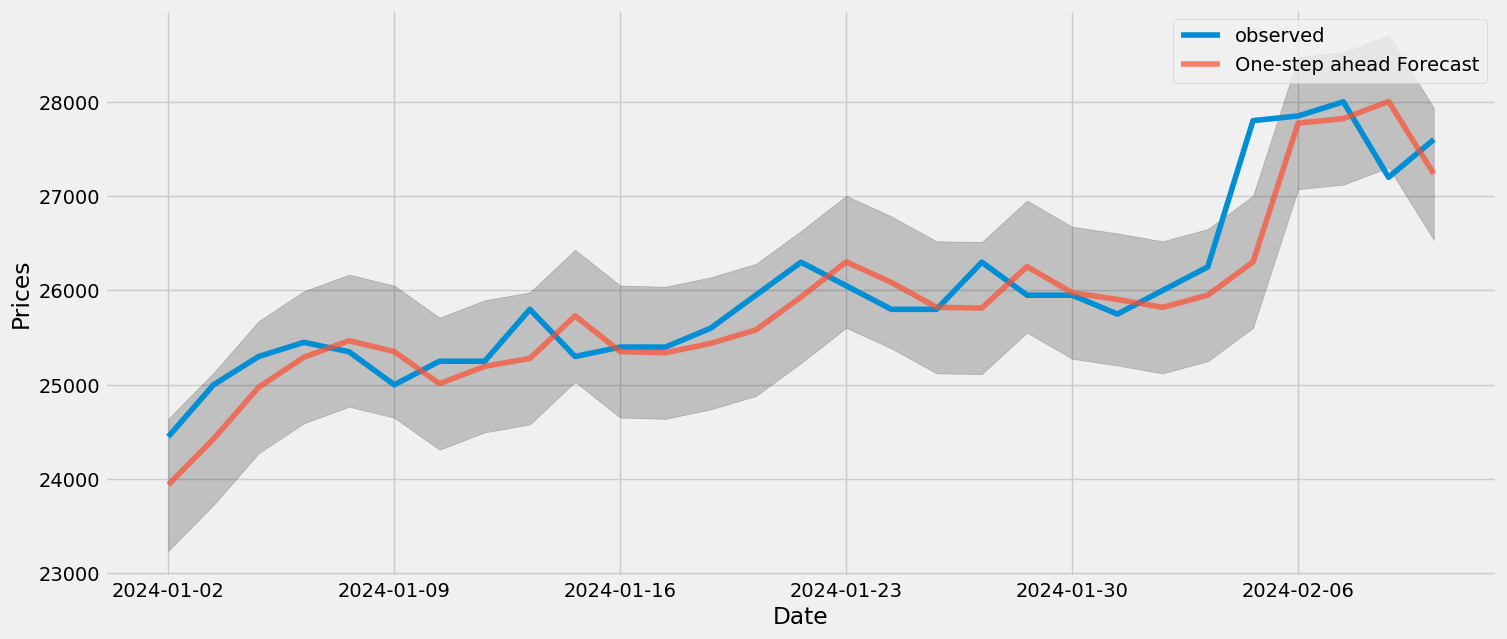

In [13]:
ax = df['ACB']['2024':].plot(label='observed', figsize=(16,7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()

plt.show()

In [14]:
y_forecasted = pred.predicted_mean
y_truth = df['ACB']['2024':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 184724.42


In [54]:
mod = sm.tsa.statespace.SARIMAX(df.ACB[:'2024-01-02'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24289D+00    |proj g|=  1.22209D-01


 This problem is unconstrained.



At iterate    5    f=  7.21629D+00    |proj g|=  4.06060D-02

At iterate   10    f=  7.21436D+00    |proj g|=  9.70542D-04

At iterate   15    f=  7.21387D+00    |proj g|=  1.72678D-02

At iterate   20    f=  7.21003D+00    |proj g|=  3.91930D-02

At iterate   25    f=  7.20942D+00    |proj g|=  2.25265D-03

At iterate   30    f=  7.20687D+00    |proj g|=  3.29016D-02

At iterate   35    f=  7.18394D+00    |proj g|=  1.20684D-01

At iterate   40    f=  7.11371D+00    |proj g|=  7.57533D-02

At iterate   45    f=  7.11121D+00    |proj g|=  9.22306D-04

At iterate   50    f=  7.11121D+00    |proj g|=  1.28662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [61]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=14)

# Get confidence intervals of forecasts
pred_uci = pred_uc.conf_int()

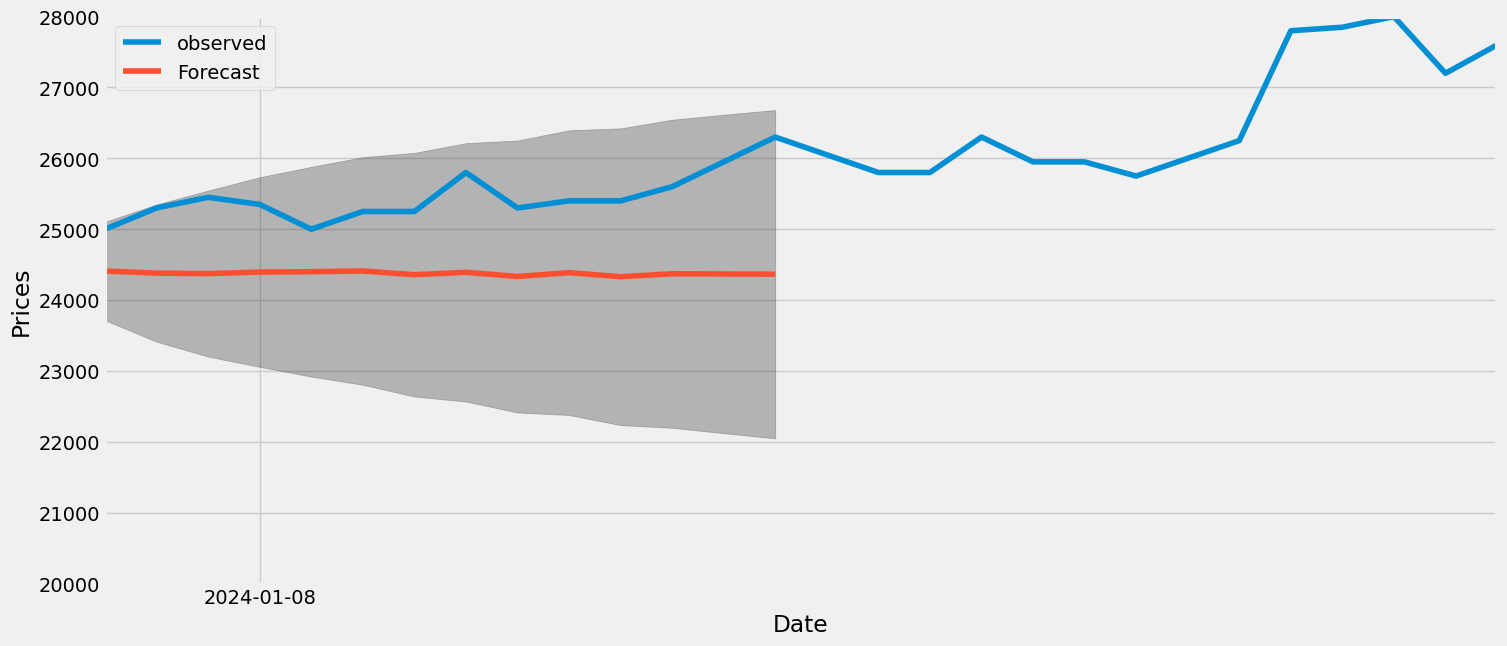

In [68]:
ax = df['ACB'].plot(label='observed', figsize=(16, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_uci.index,
                pred_uci.iloc[:, 0],
                pred_uci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.xlim(997, 1024)
plt.ylim(20000, 28000)
plt.legend()
plt.show()